Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_turk = pd.read_csv("D:/Spyder/Data-Envelopment-Analysis-Excel/Data/Turkey Power Supply/785754_1350140_bundle_archive/RealTimeConsumption-31122015-18072020.csv")

In [3]:
df_turk.head(9)

,Date,Hour,Consumption (MWh)
0,31.12.2015,00:00,"29,590.88"
1,31.12.2015,01:00,"27,785.43"
2,31.12.2015,02:00,"26,516.53"
3,31.12.2015,03:00,"26,091.62"
4,31.12.2015,04:00,"25,871.54"
5,31.12.2015,05:00,"26,053.84"
6,31.12.2015,06:00,"26,889.99"
7,31.12.2015,07:00,"28,103.02"
8,31.12.2015,08:00,"32,321.87"


# Basic Info

In [4]:
def basic_info(data):
    print("The data shape is: ", data.shape)
    print("The data size is: ", data.size)
    data.info()
    categorical, numerical = list(), list()
    for i in data.columns:
        if data[i].dtype == object:
            categorical.append(i)
        else:
            numerical.append(i)
    print(categorical)
    print(numerical)
    return categorical, numerical

In [5]:
cat1, num1 = basic_info(df_turk)

The data shape is:  (39888, 3)
The data size is:  119664
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39888 entries, 0 to 39887
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date               39888 non-null  object
 1   Hour               39888 non-null  object
 2   Consumption (MWh)  39888 non-null  object
dtypes: object(3)
memory usage: 935.0+ KB
['Date', 'Hour', 'Consumption (MWh)']
[]


# Data Modification

We will be converting Date to Datetime, Consumption to float and Time to Time

In [6]:
df_turk['Date'] = pd.to_datetime(df_turk['Date'])

In [7]:
from datetime import time
def change_into_time(x):
    a, b = x.split(":")
    a, b = int(a), int(b)
    return time(a,b)

In [8]:
df_turk['Hour'] = df_turk['Hour'].apply(lambda x: change_into_time(x))

In [9]:
def change_to_float(x):
    x = x.replace(",", "")
    return float(x)

In [10]:
df_turk['Consumption (MWh)'] = df_turk['Consumption (MWh)'].apply(lambda x: change_to_float(x))

In [11]:
cat2, num2 = basic_info(df_turk)

The data shape is:  (39888, 3)
The data size is:  119664
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39888 entries, 0 to 39887
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               39888 non-null  datetime64[ns]
 1   Hour               39888 non-null  object        
 2   Consumption (MWh)  39888 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 935.0+ KB
['Hour']
['Date', 'Consumption (MWh)']


In [12]:
df_turk.head()

,Date,Hour,Consumption (MWh)
0,2015-12-31,00:00:00,29590.88
1,2015-12-31,01:00:00,27785.43
2,2015-12-31,02:00:00,26516.53
3,2015-12-31,03:00:00,26091.62
4,2015-12-31,04:00:00,25871.54


Lets see if we have some null values

In [13]:
df_turk.isnull().sum()

Date                 0
Hour                 0
Consumption (MWh)    0
dtype: int64

Thats good...

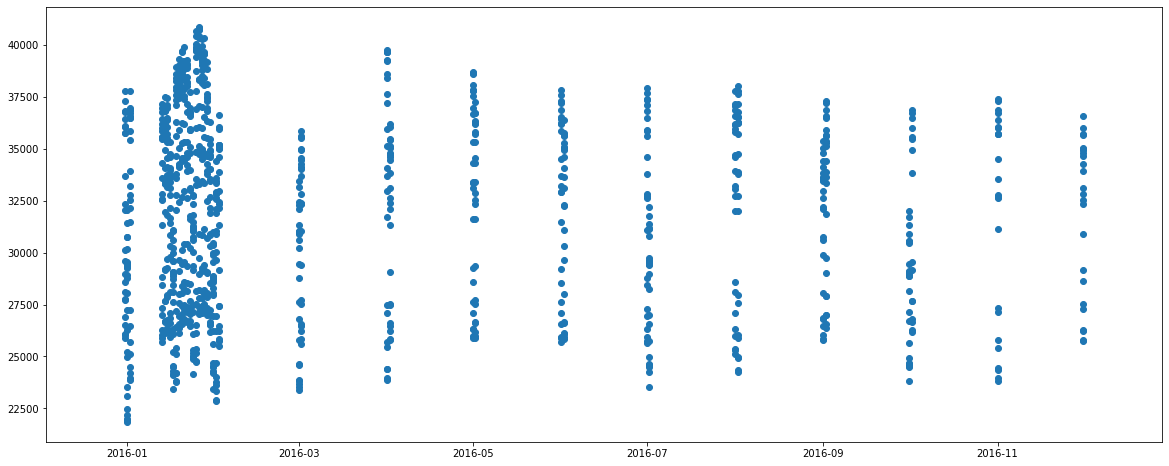

In [16]:
plt.figure(figsize=(20,8))
plt.scatter(df_turk['Date'][:1000], df_turk["Consumption (MWh)"][:1000])

lets make a function which will take month and year as two inputs: starting date and ending date, and will plot a scatter plot b/w those two dates

In [17]:
import datetime

In [40]:
def lets_plot(m1, d1, m2, d2, data):
    """
    Please enter in the format: date1: mm, yyyy
                                date2: mm, yyyy"""
    d1 = datetime.date(d1, m1, 1)
    d2 = datetime.date(d2, m2, 1)
    print(d1,"\n",d2)
    data = data[data["Date"]> d1]
    data = data[data["Date"]< d2]
    plt.scatter(data['Date'], data['Consumption (MWh)'])

In [41]:
lets_plot(1,2016,7,2016,df_turk)

2016-01-01 
 2016-07-01


TypeError: Invalid comparison between dtype=datetime64[ns] and date